In [1]:
#import necessary libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### Reading and Understanding the Data

In [3]:
# Reading the data
house_data = pd.read_csv('train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Checking the shape
house_data.shape

(1460, 81)

In [5]:
# Checking various aspects of dataset such as types and null values
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Describing the data
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Cleaning

In [7]:
# Converting MSSubClass from integer to categorical
def func(x):
    if x == 20:
        return '1SN'
    elif x == 30:
        return '1SO'
    elif x == 40:
        return '1SF'
    elif x == 45:
        return '1.5SUF'
    elif x == 50:
        return '1.5SF'
    elif x == 60:
        return '2SN'
    elif x == 70:
        return '2SO'
    elif x == 75:
        return '2.5S'
    elif x == 80:
        return 'S/ML'
    elif x == 85:
        return 'SFO'
    elif x == 90:
        return 'Dup'
    elif x == 120:
        return '1SPUD'
    elif x == 150:
        return '1.5SPUD'
    elif x == 160:
        return '2SPUD'
    elif x == 180:
        return 'PUDML'
    else:
        return '2FC'
    
house_data['MSSubClass'] = house_data['MSSubClass'].apply(func)

In [8]:
# Checking the type of MSSubClass again
house_data.MSSubClass.dtype

dtype('O')

#### Checking for missing values

In [9]:
# Checking for % of missing values
round(house_data.isnull().mean(),2)*100

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage       18.0
LotArea            0.0
Street             0.0
Alley             94.0
LotShape           0.0
LandContour        0.0
Utilities          0.0
LotConfig          0.0
LandSlope          0.0
Neighborhood       0.0
Condition1         0.0
Condition2         0.0
BldgType           0.0
HouseStyle         0.0
OverallQual        0.0
OverallCond        0.0
YearBuilt          0.0
YearRemodAdd       0.0
RoofStyle          0.0
RoofMatl           0.0
Exterior1st        0.0
Exterior2nd        0.0
MasVnrType         1.0
MasVnrArea         1.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
BsmtQual           3.0
BsmtCond           3.0
BsmtExposure       3.0
BsmtFinType1       3.0
BsmtFinSF1         0.0
BsmtFinType2       3.0
BsmtFinSF2         0.0
BsmtUnfSF          0.0
TotalBsmtSF        0.0
Heating            0.0
HeatingQC          0.0
CentralAir         0.0
Electrical         0.0
1stFlrSF   

**Variables having higher % (>45%) of missing values:**
1. Alley (94) 
2. FireplaceQu(47) 
3. PoolQC(100) 
4. Fence(81) 
5. MiscFeature(96)

In [10]:
# dropping variable having higher % of missing values
house_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis = 1, inplace=True)
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2SN,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1SN,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2SN,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2SO,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2SN,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
# Checking shape after dropping
house_data.shape

(1460, 76)

In [12]:
# Categorical Data

cat_data = house_data.select_dtypes(exclude = ['int', 'int64', 'float']).columns
cat_data

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
# checking for highly skewed data

for i in cat_data:
    print(round(house_data[i].value_counts()/house_data.shape[0] * 100),0)

1SN       37.0
2SN       20.0
1.5SF     10.0
1SPUD      6.0
1SO        5.0
2SPUD      4.0
2SO        4.0
S/ML       4.0
Dup        4.0
2FC        2.0
SFO        1.0
2.5S       1.0
1.5SUF     1.0
PUDML      1.0
1SF        0.0
Name: MSSubClass, dtype: float64 0
RL         79.0
RM         15.0
FV          4.0
RH          1.0
C (all)     1.0
Name: MSZoning, dtype: float64 0
Pave    100.0
Grvl      0.0
Name: Street, dtype: float64 0
Reg    63.0
IR1    33.0
IR2     3.0
IR3     1.0
Name: LotShape, dtype: float64 0
Lvl    90.0
Bnk     4.0
HLS     3.0
Low     2.0
Name: LandContour, dtype: float64 0
AllPub    100.0
NoSeWa      0.0
Name: Utilities, dtype: float64 0
Inside     72.0
Corner     18.0
CulDSac     6.0
FR2         3.0
FR3         0.0
Name: LotConfig, dtype: float64 0
Gtl    95.0
Mod     4.0
Sev     1.0
Name: LandSlope, dtype: float64 0
NAmes      15.0
CollgCr    10.0
OldTown     8.0
Edwards     7.0
Somerst     6.0
Gilbert     5.0
NridgHt     5.0
Sawyer      5.0
NWAmes      5.0
SawyerW  

**Highly skewed features (in %) are:**
1. Street (100)
2. LandContour (90)
3. Utilities(100)
4. LandSlope (95)
5. Condition1 (86)
6. Condition2 (99)
7. BldgType (84)
8. RoofMatl (98)
9. ExterCond (88)
10. BsmtCond (90)
11. BsmtFinType2 (86)
12. Heating (98)
13. CentralAir (93)
14. Electrical (91)
15. Functional (93)
16. GarageQual (90)
17. GarageCond (91)
18. PavedDrive (92)
19. SaleType (87)
20. SaleCondition (82)

In [14]:
# Dropping highly skewed columns >= 90 as mentioned above

house_data.drop(['Street','LandContour','Utilities','LandSlope','Condition2','RoofMatl',
                 'BsmtCond','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond',
                 'PavedDrive'], axis = 1, inplace = True)
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2SN,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1SN,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2SN,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2SO,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2SN,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
# Checking the shape again after dropping highly skewed variables
house_data.shape

(1460, 62)

In [16]:
# Re-checking the null value %
round(house_data.isnull().sum()/len(house_data) * 100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
LotShape          0.00
LotConfig         0.00
Neighborhood      0.00
Condition1        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
HeatingQC         0.00
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGr

Features having less % of null values:
- LotFrontage      17.74
- MasVnrType        0.55
- MasVnrArea        0.55
- BsmtQual          2.53
- BsmtExposure      2.60
- BsmtFinType1      2.53
- GarageType        5.55
- GarageYrBlt       5.55
- GarageFinish      5.55

In [17]:
# Handling less missing values using imputation

# filling the NaN values for LotFrontage with mean as it is a numerical variable
house_data.LotFrontage = house_data.LotFrontage.fillna(house_data.LotFrontage.mean())

In [18]:
mas = house_data[house_data.MasVnrType.isnull()]

mas[['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [19]:
# Imputing MasVnrType as 'None' and corresponding MasVnrArea is imputed as 0 from the above table.

house_data.MasVnrType = house_data.MasVnrType.fillna('None')
house_data.MasVnrArea = house_data.MasVnrArea.fillna(0)

# Imputing Basement related features as 'No Basement' because 'NaN' in the feature means that there is no basement available.
house_data.BsmtQual = house_data.BsmtQual.fillna('No Basement')
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No Basement')
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('No Basement')

# Similarly for Garage related features
house_data.GarageType = house_data.GarageType.fillna('No Garage')
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)
house_data.GarageFinish = house_data.GarageFinish.fillna('No Garage')

In [20]:
# Again checking for missing values
house_data.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
LotShape          0
LotConfig         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
HeatingQC         0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Fireplaces        0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0


As there is no missing values in the dataset I can proceed with EDA and Preparing Data for Modeling Steps.

### Exploratory Data Analysis

In [21]:
# Checking Continuous and CAtegorical varibles
house_data.nunique().sort_values()

HalfBath            3
BsmtHalfBath        3
FullBath            4
GarageFinish        4
LotShape            4
ExterQual           4
Fireplaces          4
KitchenQual         4
MasVnrType          4
KitchenAbvGr        4
BsmtFullBath        4
BsmtExposure        5
BsmtQual            5
ExterCond           5
HeatingQC           5
YrSold              5
BldgType            5
LotConfig           5
MSZoning            5
GarageCars          5
SaleCondition       6
Foundation          6
RoofStyle           6
BsmtFinType2        6
BsmtFinType1        7
GarageType          7
BedroomAbvGr        8
PoolArea            8
HouseStyle          8
SaleType            9
OverallCond         9
Condition1          9
OverallQual        10
MoSold             12
TotRmsAbvGrd       12
MSSubClass         15
Exterior1st        15
Exterior2nd        16
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
Neighborhood       25
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        98
LotFrontag

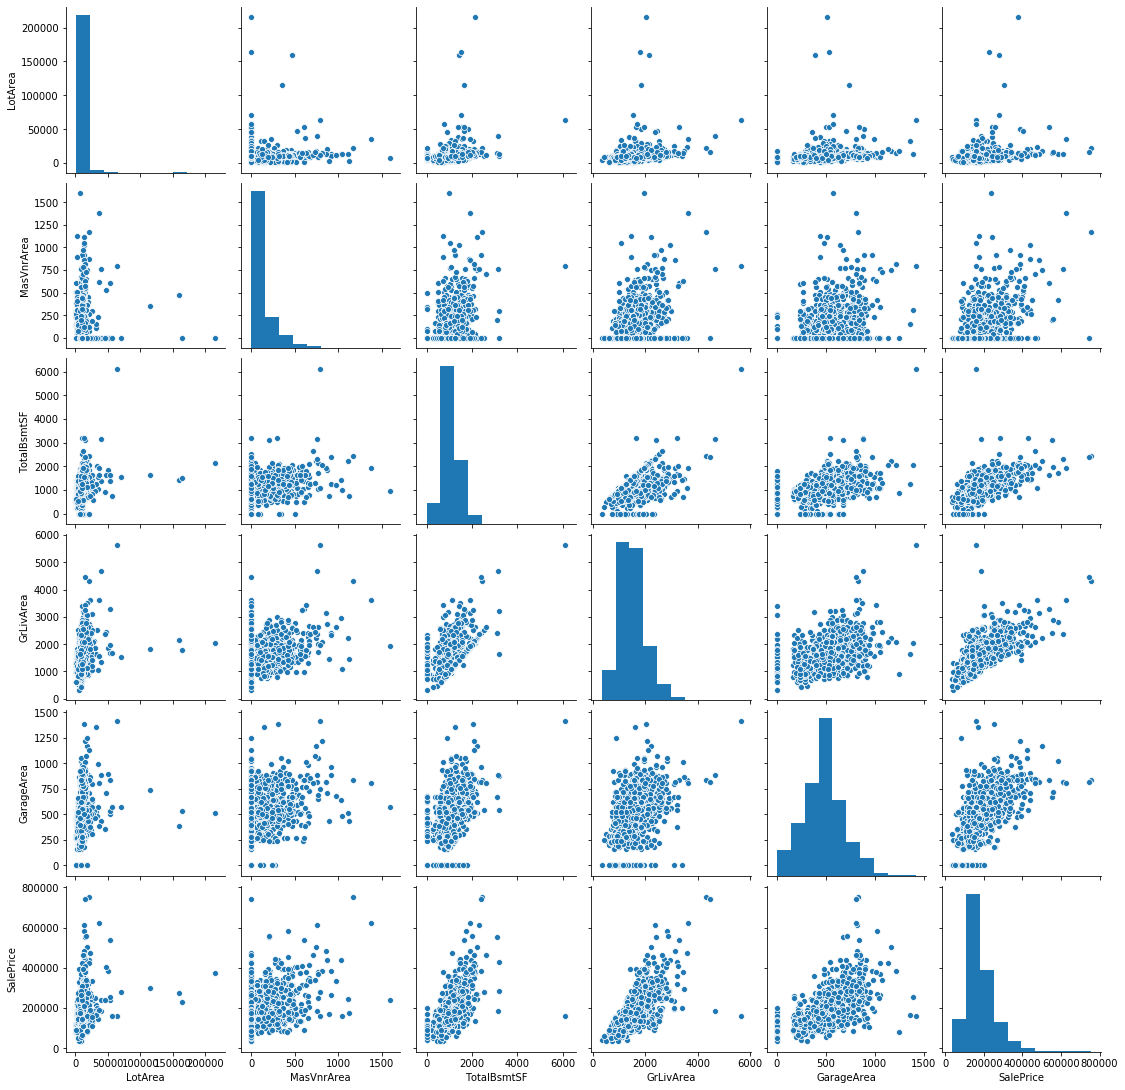

In [22]:
# Checking correlations between area related variable and target variable 'SalePrice'
sns.pairplot(house_data[['LotArea','MasVnrArea','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']])
plt.show()

`Inferences:` From the above plot it shows that the varaibles 'TotalBsmtSF', 'GrLivArea', 'GarageArea' are slightly correlated with the target variable 'SalePrice'.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

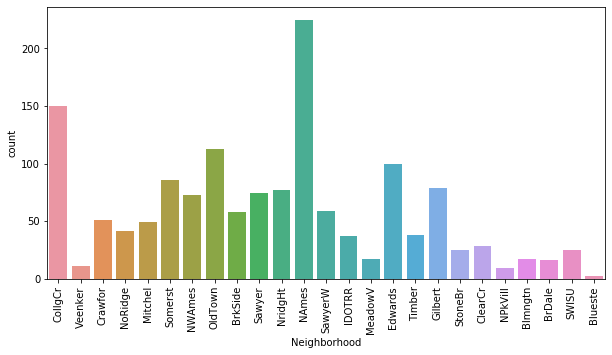

In [23]:
# Finding number of houses in the neighborhood.
plt.figure(figsize = [10,5])
sns.countplot(data = house_data,x = 'Neighborhood')
plt.xticks(rotation=90)

`Inferences:` Looks like more number of houses are present in the North Ames (NAmes) neighborhood.

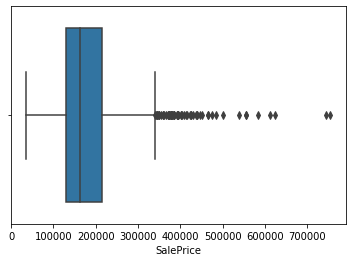

In [24]:
# Chekcing target variable
sns.boxplot(house_data.SalePrice)

`Inferences:` Lots of data points at the upper fence of the box plot. Cannot handle these outliers using capping or binning as in linear regression extrapolation is not possible.

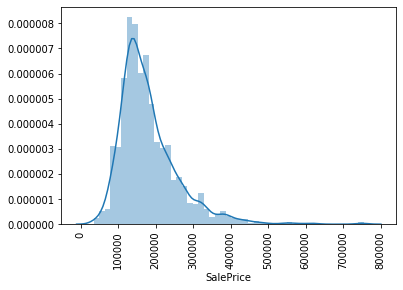

In [25]:
# So lets check for skewness 
sns.distplot((house_data['SalePrice']))
plt.xticks(rotation=90)
plt.show()

In [26]:
# Skewness value
house_data.SalePrice.skew()

1.8828757597682129

Since the target variable is right skewed its better to normalize before the creation of the model.

In [27]:
## Adding the transformed target variable

house_data['SalePrice_Transformed'] = np.log(house_data['SalePrice'])
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_Transformed
0,1,2SN,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,2,1SN,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,3,2SN,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,4,2SO,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,5,2SN,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,12.429216


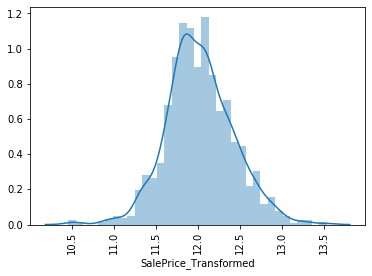

In [28]:
# Checking the skewness of the transformed variable
sns.distplot(house_data['SalePrice_Transformed'])
plt.xticks(rotation=90)
plt.show()

In [29]:
# Skewness value of transformed variable
house_data['SalePrice_Transformed'].skew()

0.12133506220520406

`Inference:` The above plot for transformed target variable is kind of normalized compared to the original target variable. So this transformed variable can be used for modeling and drop the original target variable.

### Data Preparation

#### Dummy Variable Creation
Before creating the dummies let's reduce the levels in some features using bucketing some levels to 'Other'.

In [30]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1460 non-null   int64  
 1   MSSubClass             1460 non-null   object 
 2   MSZoning               1460 non-null   object 
 3   LotFrontage            1460 non-null   float64
 4   LotArea                1460 non-null   int64  
 5   LotShape               1460 non-null   object 
 6   LotConfig              1460 non-null   object 
 7   Neighborhood           1460 non-null   object 
 8   Condition1             1460 non-null   object 
 9   BldgType               1460 non-null   object 
 10  HouseStyle             1460 non-null   object 
 11  OverallQual            1460 non-null   int64  
 12  OverallCond            1460 non-null   int64  
 13  YearBuilt              1460 non-null   int64  
 14  YearRemodAdd           1460 non-null   int64  
 15  Roof

In [31]:
house_data['MSSubClass'].value_counts()/house_data.shape[0]

1SN       0.367123
2SN       0.204795
1.5SF     0.098630
1SPUD     0.059589
1SO       0.047260
2SPUD     0.043151
2SO       0.041096
S/ML      0.039726
Dup       0.035616
2FC       0.020548
SFO       0.013699
2.5S      0.010959
1.5SUF    0.008219
PUDML     0.006849
1SF       0.002740
Name: MSSubClass, dtype: float64

In [32]:
# Bucketing MSSubClass
house_data.MSSubClass.replace(['1SO','2SPUD','2SO','S/ML','Dup','2FC','SFO','2.5S','1.5SUF','PUDML','1SF'],
                              'Other', inplace = True)
house_data['MSSubClass'].value_counts()/house_data.shape[0]

1SN      0.367123
Other    0.269863
2SN      0.204795
1.5SF    0.098630
1SPUD    0.059589
Name: MSSubClass, dtype: float64

In [33]:
house_data['Neighborhood'].value_counts()/house_data.shape[0]

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
SWISU      0.017123
StoneBr    0.017123
Blmngtn    0.011644
MeadowV    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

In [34]:
# Bucketing Neighborhood
house_data.Neighborhood.replace(['Sawyer','NWAmes','SawyerW','BrkSide','Crawfor','Mitchel','NoRidge','Timber','IDOTRR',
                                 'ClearCr','StoneBr','SWISU','MeadowV','Blmngtn','BrDale','Veenker','NPkVill','Blueste'],
                                'Other', inplace = True)
house_data['Neighborhood'].value_counts()/house_data.shape[0]

Other      0.431507
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Name: Neighborhood, dtype: float64

In [35]:
# Bucketing Condition1
house_data['Condition1'].value_counts()/house_data.shape[0]

Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64

In [36]:
# Bucketing Condition1
house_data.Condition1.replace(['RRAn','PosN','RRAe','PosA','RRNn','RRNe'],'Other', inplace = True)
house_data['Condition1'].value_counts()/house_data.shape[0]

Norm      0.863014
Feedr     0.055479
Other     0.048630
Artery    0.032877
Name: Condition1, dtype: float64

In [37]:
# Bucketing BldgType
house_data['BldgType'].value_counts()/house_data.shape[0]

1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64

In [38]:
# Bucketing BldgType
house_data.BldgType.replace(['Twnhs','2fmCon'],'Other', inplace = True)
house_data['BldgType'].value_counts()/house_data.shape[0]

1Fam      0.835616
TwnhsE    0.078082
Other     0.050685
Duplex    0.035616
Name: BldgType, dtype: float64

In [39]:
house_data['HouseStyle'].value_counts()/house_data.shape[0]

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64

In [40]:
# Bucketing HouseStyle
house_data.HouseStyle.replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Other', inplace = True)
house_data['HouseStyle'].value_counts()/house_data.shape[0]

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
Other     0.047945
SLvl      0.044521
Name: HouseStyle, dtype: float64

In [41]:
house_data['RoofStyle'].value_counts()/house_data.shape[0]

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

In [42]:
# Bucketing RoofStyle
house_data.RoofStyle.replace(['Gambrel','Mansard','Shed'],'Other', inplace = True)
house_data['RoofStyle'].value_counts()/house_data.shape[0]

Gable    0.781507
Hip      0.195890
Other    0.013699
Flat     0.008904
Name: RoofStyle, dtype: float64

In [43]:
house_data['Exterior1st'].value_counts()/house_data.shape[0]

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
ImStucc    0.000685
AsphShn    0.000685
CBlock     0.000685
Name: Exterior1st, dtype: float64

In [44]:
# Bucketing Exterior1st
house_data.Exterior1st.replace(['Plywood','CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','AsphShn',
                                'CBlock'],'Other', inplace = True)
house_data['Exterior1st'].value_counts()/house_data.shape[0]

VinylSd    0.352740
Other      0.203425
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Name: Exterior1st, dtype: float64

In [45]:
house_data['Exterior2nd'].value_counts()/house_data.shape[0]

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: Exterior2nd, dtype: float64

In [46]:
# Bucketing Exterior2nd
house_data.Exterior2nd.replace(['Plywood','CmentBd','Wd Shng','Stucco','BrkFace','AsbShng','ImStucc','Brk Cmn','Stone','AsphShn',
                                'CBlock'],'Other', inplace = True)
house_data['Exterior2nd'].value_counts()/house_data.shape[0]

VinylSd    0.345205
Other      0.231507
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Name: Exterior2nd, dtype: float64

In [47]:
house_data['Foundation'].value_counts()/house_data.shape[0]

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64

In [48]:
# Bucketing Foundation
house_data.Foundation.replace(['BrkTil','Slab','Stone','Wood'],'Other', inplace = True)
house_data['Foundation'].value_counts()/house_data.shape[0]

PConc     0.443151
CBlock    0.434247
Other     0.122603
Name: Foundation, dtype: float64

In [49]:
house_data['GarageType'].value_counts()/house_data.shape[0]

Attchd       0.595890
Detchd       0.265068
BuiltIn      0.060274
No Garage    0.055479
Basment      0.013014
CarPort      0.006164
2Types       0.004110
Name: GarageType, dtype: float64

In [50]:
# Bucketing GarageType
house_data.GarageType.replace(['Basment','CarPort','2Types'],'Other', inplace = True)
house_data['GarageType'].value_counts()/house_data.shape[0]

Attchd       0.595890
Detchd       0.265068
BuiltIn      0.060274
No Garage    0.055479
Other        0.023288
Name: GarageType, dtype: float64

In [51]:
# Bucketing SaleType
house_data['SaleType'].value_counts()/house_data.shape[0]

WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLw    0.003425
ConLI    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64

In [52]:
# Bucketing SaleType
house_data.SaleType.replace(['ConLD','ConLw','ConLI','CWD','Oth','Con'],'Other', inplace = True)
house_data['SaleType'].value_counts()/house_data.shape[0]

WD       0.867808
New      0.083562
COD      0.029452
Other    0.019178
Name: SaleType, dtype: float64

In [53]:
# Bucketing SaleCondition
house_data['SaleCondition'].value_counts()/house_data.shape[0]

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

In [54]:
# Bucketing SaleCondition
house_data.SaleCondition.replace(['Alloca','AdjLand'],'Other', inplace = True)
house_data['SaleCondition'].value_counts()/house_data.shape[0]

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Other      0.010959
Name: SaleCondition, dtype: float64

In [55]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_Transformed
0,1,2SN,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,2,1SN,RL,80.0,9600,Reg,FR2,Other,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,3,2SN,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,4,Other,RL,60.0,9550,IR1,Corner,Other,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Other,None,0.0,TA,TA,Other,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,5,2SN,RL,84.0,14260,IR1,FR2,Other,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,12.429216


In [56]:
# Dummyfication of features

features = ['MSSubClass','MSZoning','LotShape','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle', 
            'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtExposure',
            'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','GarageType','GarageFinish','SaleType','SaleCondition']

for i in features:
    # Creating dummies for each variable and concating to the data set
    i_dummy = pd.get_dummies(house_data[i], prefix = i,drop_first=True)
    house_data = pd.concat([house_data,i_dummy],1)
    
    # Deleting feature for which dummies were created
    house_data = house_data.drop(i,1)
house_data.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Transformed,MSSubClass_1SN,MSSubClass_1SPUD,MSSubClass_2SN,MSSubClass_Other,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,...,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_Other,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,0,0,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,1,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,0,0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,0,0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [57]:
from datetime import date

## Derive age column from YearBuilt
today_year = date.today().year
house_data['Age'] = today_year - house_data.YearBuilt

In [58]:
house_data.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Transformed,MSSubClass_1SN,MSSubClass_1SPUD,MSSubClass_2SN,MSSubClass_Other,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_Other,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Age
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,0,0,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,17
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,1,0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,44
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,0,0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,19
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,105
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,0,0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,20


In [59]:
# Deleting the year attributes
house_data.drop(['YearRemodAdd','GarageYrBlt','MoSold','YrSold'], axis = 1, inplace = True)
house_data.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,SalePrice_Transformed,MSSubClass_1SN,MSSubClass_1SPUD,MSSubClass_2SN,MSSubClass_Other,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Edwards,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_Other,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Age
0,1,65.0,8450,7,5,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,12.247694,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,17
1,2,80.0,9600,6,8,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,12.109011,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,44
2,3,68.0,11250,7,5,2001,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,12.317167,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,19
3,4,60.0,9550,7,5,1915,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,11.849398,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,105
4,5,84.0,14260,8,5,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,12.429216,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,20


#### Splitting data into train & test sets:

In [60]:
# Creating X and y variables

# Adding transformed target variable to y
y = house_data.pop('SalePrice_Transformed')
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice_Transformed, Length: 1460, dtype: float64

In [61]:
# Adding remaining columns except the 'Id', 'YearBuilt' and original target variable i.e., 'SalePrice' to X
X = house_data.drop(['Id','YearBuilt','SalePrice'], axis = 1)
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_1SN,MSSubClass_1SPUD,MSSubClass_2SN,MSSubClass_Other,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_Other,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Age
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,17
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,44
2,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,19
3,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,105
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,20


In [62]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [63]:
# Checking the shape of train and test data
print(X_train.shape)
print(X_test.shape)

(1021, 126)
(439, 126)


#### Perform Scaling

In [64]:
# Scaling Variables except Dummy variables and categoricals having 0/1 using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
               'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
               'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea',
               'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','Age']

X_train[scaler_vars] = scaler.fit_transform(X_train[scaler_vars])

In [65]:
# Checking the data set again
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_1SN,MSSubClass_1SPUD,MSSubClass_2SN,MSSubClass_Other,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_Other,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Other,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,Age
318,0.917128,-0.057261,0.648310,-0.532073,0.809137,1.159065,-0.293313,-0.454262,0.621091,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,1.555150,0.622148,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,-0.715324
239,-0.803994,-0.169753,-0.066511,-1.448170,-0.558025,-0.761831,-0.293313,0.172244,-0.712611,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,0.308833,0.622148,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0.868511
986,-0.486945,-0.502762,-0.066511,2.216221,-0.558025,-0.964030,-0.293313,-0.175567,-1.257424,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,-0.937484,-0.927153,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,2.023391
1416,-0.441652,0.082504,-1.496155,0.384025,-0.558025,-0.964030,-0.293313,0.475464,-0.621082,0.194590,1.609195,-0.124502,1.451965,-0.837450,-0.247791,0.784821,-0.753316,1.395790,4.112612,2.801467,-0.927153,0.306009,0.414904,-0.744598,-0.710899,1.437486,-0.121922,-0.275126,-0.062302,-0.084263,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,2.848305
390,-0.894579,-0.202365,-0.781333,2.216221,-0.558025,-0.445625,1.996400,-0.746334,-0.438025,-0.522027,0.143490,-0.124502,-0.284338,1.066863,-0.247791,-1.028080,-0.753316,1.395790,-0.234155,0.308833,-0.927153,-1.034916,-0.414858,-0.744598,1.253944,1.405809,-0.121922,-0.275126,-0.062302,-0.084263,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,2.353356


### Model Building

In [66]:
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [67]:
# Creating object LinearRegression and RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25) # Running RFE for 25 variables
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 86),
 ('LotArea', False, 60),
 ('OverallQual', True, 1),
 ('OverallCond', False, 14),
 ('MasVnrArea', False, 102),
 ('BsmtFinSF1', False, 6),
 ('BsmtFinSF2', False, 7),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', False, 5),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 8),
 ('GrLivArea', False, 2),
 ('BsmtFullBath', False, 43),
 ('BsmtHalfBath', False, 92),
 ('FullBath', False, 73),
 ('HalfBath', False, 84),
 ('BedroomAbvGr', False, 81),
 ('KitchenAbvGr', False, 74),
 ('TotRmsAbvGrd', False, 70),
 ('Fireplaces', False, 54),
 ('GarageCars', True, 1),
 ('GarageArea', False, 97),
 ('WoodDeckSF', False, 79),
 ('OpenPorchSF', False, 98),
 ('EnclosedPorch', False, 78),
 ('3SsnPorch', False, 83),
 ('ScreenPorch', False, 75),
 ('PoolArea', False, 67),
 ('MiscVal', False, 95),
 ('MSSubClass_1SN', False, 94),
 ('MSSubClass_1SPUD', False, 51),
 ('MSSubClass_2SN', False, 23),
 ('MSSubClass_Other', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH

In [69]:
cols = X_train.columns[rfe.support_]
cols

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'MSSubClass_Other',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Edwards', 'Neighborhood_Somerst', 'ExterCond_Fa',
       'ExterCond_Gd', 'ExterCond_TA', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_No Basement', 'BsmtQual_TA', 'BsmtFinType1_No Basement',
       'HeatingQC_Po', 'GarageType_No Garage', 'SaleType_New',
       'SaleType_Other', 'SaleType_WD', 'SaleCondition_Partial'],
      dtype='object')

In [70]:
# Columns selected from rfe and storing it in 'cols'
X_train_rfe = X_train[cols]

In [71]:
# Scaling Test set
X_test[scaler_vars] = scaler.transform(X_test[scaler_vars])
X_test_rfe = X_test[cols]

### Ridge and Lasso

In [72]:
# Ridge

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25, 30, 40, 50, 75, 100]}

ridge = Ridge()    #Instantiating the object

# cross-validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring = 'neg_mean_absolute_error', cv = folds, 
                        return_train_score = True, verbose = 1)
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 25, 30, 40, 50, 75,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [73]:
# Checking the results of Cross Validation
cv_results_ridge = pd.DataFrame(model_cv.cv_results_)
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0032,0.000400,0.0016,0.00049,0.0001,{'alpha': 0.0001},-0.110748,-0.114514,-0.111832,-0.108412,-0.105507,-0.110202,0.003059,1,-0.108648,-0.102926,-0.105901,-0.108193,-0.109697,-0.107073,0.002416
1,0.0030,0.000000,0.0012,0.00040,0.001,{'alpha': 0.001},-0.110745,-0.114512,-0.111838,-0.108412,-0.105507,-0.110203,0.003059,2,-0.108647,-0.102927,-0.105903,-0.108194,-0.109697,-0.107074,0.002416
2,0.0030,0.000633,0.0016,0.00049,0.01,{'alpha': 0.01},-0.110718,-0.114541,-0.111900,-0.108415,-0.105514,-0.110218,0.003071,3,-0.108644,-0.102936,-0.105914,-0.108199,-0.109698,-0.107078,0.002412
3,0.0028,0.000400,0.0014,0.00049,0.05,{'alpha': 0.05},-0.110600,-0.114714,-0.112153,-0.108430,-0.105557,-0.110291,0.003130,4,-0.108635,-0.102974,-0.105959,-0.108256,-0.109700,-0.107105,0.002399
4,0.0036,0.000490,0.0014,0.00049,0.1,{'alpha': 0.1},-0.110462,-0.114895,-0.112420,-0.108450,-0.105617,-0.110369,0.003193,5,-0.108628,-0.103022,-0.106007,-0.108323,-0.109742,-0.107144,0.002392


In [74]:
# Finding optimal score
model_cv.best_score_

-0.11020225674369051

In [75]:
# # Finding optimal parameter for alpha
model_cv.best_params_

{'alpha': 0.0001}

In [76]:
# using optimal alpha and fitting the model using Ridge
alpha = model_cv.best_params_['alpha']

ridge = Ridge(alpha = alpha)
ridge.fit(X_train_rfe, y_train)
ar1 = ridge.coef_
ar1

array([ 0.12446889,  0.11983138,  0.08808119,  0.06360823, -0.07919629,
        0.49211576,  0.49886798,  0.53678813,  0.38690921, -0.12034248,
        0.06452415, -0.31824353, -0.174896  , -0.21608762, -0.23816802,
       -0.10758396, -0.1658519 , -0.18582667, -0.1658519 , -0.17342716,
        0.02209532,  0.05863925,  0.18584308,  0.1135483 ,  0.05863925])

In [77]:
# Predictions

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

In [78]:
# R2-Score and MSE on train set
print('Training Set:')
print(r2_score(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))

# R2-Score and MSE on test set
print('Testing Set:')
print(r2_score(y_test, y_pred_test))
print(mean_squared_error(y_test, y_pred_test))

Training Set:
0.8480382278040002
0.023879936262228296
Testing Set:
0.839244564120565
0.026494871115001435


In [79]:
# Difference in the R2-Scores
r2_score(y_train, y_pred_train) - r2_score(y_test, y_pred_test)

0.008793663683435149

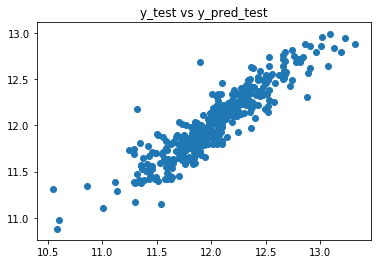

In [80]:
# y_test vs y_pred_test
plt.scatter(y_test, y_pred_test)
plt.title('y_test vs y_pred_test')
plt.show()

`Inference:`
- The Ridge model was created with 25 predcitor variables with optimal alpha = 0.0001.
- The R2-Score for training data is 0.848 and testing is 0.839.
- The MSE for training is 0.024 and testing is 0.026

##### Doubling the alpha value and re-building the model.

In [81]:
# Doubling alpha
alpha = model_cv.best_params_['alpha'] * 2

ridge = Ridge(alpha = alpha)
ridge.fit(X_train_rfe, y_train)
ar2 = ridge.coef_
ar2

array([ 0.12446991,  0.11983135,  0.08808113,  0.06360801, -0.07919597,
        0.49208285,  0.4988351 ,  0.53675913,  0.38688014, -0.12034115,
        0.06452681, -0.31820559, -0.17485853, -0.21605019, -0.23816429,
       -0.10758211, -0.1658501 , -0.18582442, -0.1658501 , -0.17340937,
        0.0220951 ,  0.0586396 ,  0.18584118,  0.11354892,  0.0586396 ])

In [82]:
# Predictions
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

In [83]:
# R2-Score and MSE on train set
print('Training Set:')
print(r2_score(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))

# R2-Score and MSE on test set
print('Testing Set:')
print(r2_score(y_test, y_pred_test))
print(mean_squared_error(y_test, y_pred_test))

Training Set:
0.8480382276329763
0.02387993628910373
Testing Set:
0.8392454026122608
0.026494732919180627


`Inference:` After doubling the alpha value
- The R2-Score for training data is 0.848 and testing is 0.839.
- The MSE for training is 0.024 and testing is 0.026

`Conclusion:` No difference in change in alpha value.

### Lasso

In [84]:
# Lasso

lasso = Lasso()    # Instantiating the object

# cross-validation

model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring = 'neg_mean_absolute_error', cv = folds, 
                        return_train_score = True, verbose = 1)
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 25, 30, 40, 50, 75,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [85]:
# Checking the results of Cross Validation
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013201,9.908169e-03,0.0020,6.325605e-04,0.0001,{'alpha': 0.0001},-0.110167,-0.115749,-0.113393,-0.108544,-0.105811,-0.110733,0.003509,1,-0.108845,-0.103384,-0.106278,-0.108686,-0.110049,-0.107448,0.002372
1,0.004200,3.999949e-04,0.0010,9.536743e-08,0.001,{'alpha': 0.001},-0.108975,-0.120049,-0.116939,-0.113836,-0.112031,-0.114366,0.003840,2,-0.113771,-0.107774,-0.110270,-0.113146,-0.113572,-0.111707,0.002339
2,0.003000,1.507891e-07,0.0014,4.899792e-04,0.01,{'alpha': 0.01},-0.117518,-0.129240,-0.126118,-0.123788,-0.123338,-0.124000,0.003859,3,-0.125141,-0.120307,-0.122009,-0.123243,-0.124582,-0.123057,0.001753
3,0.003400,4.899014e-04,0.0014,4.900960e-04,0.05,{'alpha': 0.05},-0.141677,-0.157520,-0.151891,-0.144580,-0.149173,-0.148968,0.005552,4,-0.150871,-0.144671,-0.147337,-0.147974,-0.150981,-0.148367,0.002365
4,0.003400,4.899403e-04,0.0012,3.999472e-04,0.1,{'alpha': 0.1},-0.169683,-0.183895,-0.175454,-0.165166,-0.176418,-0.174123,0.006364,5,-0.174176,-0.170635,-0.171800,-0.173591,-0.176823,-0.173405,0.002124


In [86]:
# Finding the optimal score
model_cv.best_score_

-0.11073276125094637

In [87]:
# Finding the optimal alpha vlaue
model_cv.best_params_

{'alpha': 0.0001}

In [88]:
# Fitting the model with optimal alpha value
alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha = alpha)
lasso.fit(X_train_rfe, y_train)
al1 = lasso.coef_
al1

array([ 0.1284757 ,  0.1196674 ,  0.08776267,  0.06277946, -0.07819344,
        0.42740147,  0.42772782,  0.47432097,  0.32399238, -0.11494991,
        0.06398357, -0.15314148, -0.01237889, -0.05402483, -0.22274652,
       -0.09904157, -0.22838312, -0.17528365, -0.08711437, -0.06972351,
        0.02075616,  0.01211124,  0.1708639 ,  0.10782909,  0.10014452])

In [89]:
# Predictions
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

In [90]:
# R2-Score and MSE on train set
print(r2_score(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))

# R2-Score and MSE on test set
print(r2_score(y_test, y_pred_test))
print(mean_squared_error(y_test, y_pred_test))

0.8474381713379648
0.02397423175480902
0.8418410647769412
0.026066929441587044


In [91]:
# Difference in the R2 Scores
r2_score(y_train, y_pred_train) - r2_score(y_test, y_pred_test)

0.005597106561023635

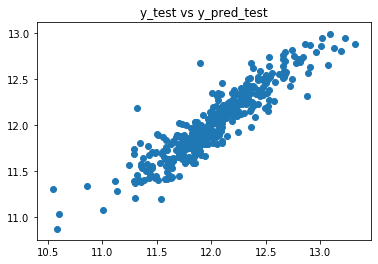

In [92]:
# y_test vs y_pred_test
plt.scatter(y_test, y_pred_test)
plt.title('y_test vs y_pred_test')
plt.show()

`Inferences:`
- The Lasso model was created with 25 predcitor variables with optimal alpha = 0.0001.
- The R2-Score for training data is 0.8474 and testing is 0.8418. This imples that the model is not overfitting.
- The MSE for training is 0.024 and testing is 0.026

##### Doubling the alpha value and re-building the model.

In [93]:
# Doubling the alpha value
alpha = model_cv.best_params_['alpha'] * 2

lasso = Lasso(alpha = alpha)
lasso.fit(X_train_rfe, y_train)
al2 = lasso.coef_
al2

array([ 0.13115055,  0.11970483,  0.08750666,  0.06195729, -0.07712763,
        0.36328585,  0.35776462,  0.41264134,  0.26148182, -0.11186732,
        0.06362703, -0.13449631,  0.        , -0.03928767, -0.20918466,
       -0.09148842, -0.21899689, -0.16697474, -0.08271954, -0.        ,
        0.01642142,  0.0183619 ,  0.15646655,  0.10187045,  0.08865486])

In [94]:
# Predictions
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

In [95]:
# R2-Score and MSE on train set
print(r2_score(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))

# R2-Score and MSE on test set
print(r2_score(y_test, y_pred_test))
print(mean_squared_error(y_test, y_pred_test))

0.8466119115126999
0.024104073830735314
0.8427850302128141
0.025911349989958258


`Inference:` After doubling the alpha value
- The R2-Score for training data is 0.8466 and testing is 0.8427.
- The MSE for training is 0.024 and testing is 0.026

`Conclusion:` No much difference in change in alpha value but very slight decrease in the R2-score.

### Observing the coefficients of Ridge and Lasso and finding the top predictors

In [96]:
# Creating the dataframe to store the columns and corresponding coeficients
coefficients = pd.DataFrame(index = X[cols].columns)
coefficients.rows = X[cols].columns

In [97]:
# Filling the dataframe with coefficients

# Without doubling alpha
coefficients['Ridge_1'] = ar1
coefficients['Lasso_1'] = al1

# With doubling alpha
coefficients['Ridge_2'] = ar2
coefficients['Lasso_2'] = al2

In [98]:
coefficients

,Ridge_1,Lasso_1,Ridge_2,Lasso_2
OverallQual,0.124469,0.128476,0.124470,0.131151
1stFlrSF,0.119831,0.119667,0.119831,0.119705
2ndFlrSF,0.088081,0.087763,0.088081,0.087507
GarageCars,0.063608,0.062779,0.063608,0.061957
MSSubClass_Other,-0.079196,-0.078193,-0.079196,-0.077128
MSZoning_FV,0.492116,0.427401,0.492083,0.363286
MSZoning_RH,0.498868,0.427728,0.498835,0.357765
MSZoning_RL,0.536788,0.474321,0.536759,0.412641
MSZoning_RM,0.386909,0.323992,0.386880,0.261482
Neighborhood_Edwards,-0.120342,-0.114950,-0.120341,-0.111867


In [99]:
# Finding the top predictor variables without doubling alpha for Ridge
coefficients['Ridge_1'].sort_values(ascending = False)

MSZoning_RL                 0.536788
MSZoning_RH                 0.498868
MSZoning_FV                 0.492116
MSZoning_RM                 0.386909
SaleType_Other              0.185843
OverallQual                 0.124469
1stFlrSF                    0.119831
SaleType_WD                 0.113548
2ndFlrSF                    0.088081
Neighborhood_Somerst        0.064524
GarageCars                  0.063608
SaleCondition_Partial       0.058639
SaleType_New                0.058639
GarageType_No Garage        0.022095
MSSubClass_Other           -0.079196
BsmtQual_Gd                -0.107584
Neighborhood_Edwards       -0.120342
BsmtFinType1_No Basement   -0.165852
BsmtQual_No Basement       -0.165852
HeatingQC_Po               -0.173427
ExterCond_Gd               -0.174896
BsmtQual_TA                -0.185827
ExterCond_TA               -0.216088
BsmtQual_Fa                -0.238168
ExterCond_Fa               -0.318244
Name: Ridge_1, dtype: float64

In [100]:
# Finding the top predictor variables without doubling alpha for Lasso
coefficients['Lasso_1'].sort_values(ascending = False)

MSZoning_RL                 0.474321
MSZoning_RH                 0.427728
MSZoning_FV                 0.427401
MSZoning_RM                 0.323992
SaleType_Other              0.170864
OverallQual                 0.128476
1stFlrSF                    0.119667
SaleType_WD                 0.107829
SaleCondition_Partial       0.100145
2ndFlrSF                    0.087763
Neighborhood_Somerst        0.063984
GarageCars                  0.062779
GarageType_No Garage        0.020756
SaleType_New                0.012111
ExterCond_Gd               -0.012379
ExterCond_TA               -0.054025
HeatingQC_Po               -0.069724
MSSubClass_Other           -0.078193
BsmtFinType1_No Basement   -0.087114
BsmtQual_Gd                -0.099042
Neighborhood_Edwards       -0.114950
ExterCond_Fa               -0.153141
BsmtQual_TA                -0.175284
BsmtQual_Fa                -0.222747
BsmtQual_No Basement       -0.228383
Name: Lasso_1, dtype: float64

**`Top 5 Predictors - Without doubling alpha (0.0001):`**
- `Ridge:`
  1. MSZoning_RL                
  2. MSZoning_RH                
  3. MSZoning_FV                
  4. MSZoning_RM 
  5. ExterCond_Fa
- `Lasso: `
  1. MSZoning_RL 
  2. MSZoning_RH 
  3. MSZoning_FV 
  4. MSZoning_RM  
  5. BsmtQual_No Basement

In [101]:
# Finding the top predictor variables with doubling alpha for Ridge
coefficients['Ridge_2'].sort_values(ascending = False)

MSZoning_RL                 0.536759
MSZoning_RH                 0.498835
MSZoning_FV                 0.492083
MSZoning_RM                 0.386880
SaleType_Other              0.185841
OverallQual                 0.124470
1stFlrSF                    0.119831
SaleType_WD                 0.113549
2ndFlrSF                    0.088081
Neighborhood_Somerst        0.064527
GarageCars                  0.063608
SaleCondition_Partial       0.058640
SaleType_New                0.058640
GarageType_No Garage        0.022095
MSSubClass_Other           -0.079196
BsmtQual_Gd                -0.107582
Neighborhood_Edwards       -0.120341
BsmtQual_No Basement       -0.165850
BsmtFinType1_No Basement   -0.165850
HeatingQC_Po               -0.173409
ExterCond_Gd               -0.174859
BsmtQual_TA                -0.185824
ExterCond_TA               -0.216050
BsmtQual_Fa                -0.238164
ExterCond_Fa               -0.318206
Name: Ridge_2, dtype: float64

In [102]:
# Finding the top predictor variables with doubling alpha for Lasso
coefficients['Lasso_2'].sort_values(ascending = False)

MSZoning_RL                 0.412641
MSZoning_FV                 0.363286
MSZoning_RH                 0.357765
MSZoning_RM                 0.261482
SaleType_Other              0.156467
OverallQual                 0.131151
1stFlrSF                    0.119705
SaleType_WD                 0.101870
SaleCondition_Partial       0.088655
2ndFlrSF                    0.087507
Neighborhood_Somerst        0.063627
GarageCars                  0.061957
SaleType_New                0.018362
GarageType_No Garage        0.016421
HeatingQC_Po               -0.000000
ExterCond_Gd                0.000000
ExterCond_TA               -0.039288
MSSubClass_Other           -0.077128
BsmtFinType1_No Basement   -0.082720
BsmtQual_Gd                -0.091488
Neighborhood_Edwards       -0.111867
ExterCond_Fa               -0.134496
BsmtQual_TA                -0.166975
BsmtQual_Fa                -0.209185
BsmtQual_No Basement       -0.218997
Name: Lasso_2, dtype: float64

**`Top 5 Predictors after doubling alpha value (0.0001 * 2):`**
- `Ridge:`
  1. MSZoning_RL                
  2. MSZoning_RH                
  3. MSZoning_FV                
  4. MSZoning_RM 
  5. ExterCond_Fa
- `Lasso:`
  1. MSZoning_RL 
  2. MSZoning_FV 
  3. MSZoning_RH 
  4. MSZoning_RM  
  5. BsmtQual_No Basement

`Question 3:`

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [103]:
X_train.shape

(1021, 126)

In [104]:
# Deleting the top-5 predictor variables
X_train_new = X_train.drop(X_train.columns[X_train.columns.str.contains('^MSZoning|^BsmtQual')], axis = 1)

In [105]:
# Checking the shape again
X_train_new.shape

(1021, 118)

In [106]:
# RFE
lm_new = LinearRegression()
lm_new.fit(X_train_new, y_train)
rfe = RFE(lm_new, 25)
rfe = rfe.fit(X_train_new, y_train)

In [107]:
list(zip(X_train_new.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 84),
 ('LotArea', False, 36),
 ('OverallQual', True, 1),
 ('OverallCond', False, 23),
 ('MasVnrArea', False, 92),
 ('BsmtFinSF1', False, 17),
 ('BsmtFinSF2', False, 21),
 ('BsmtUnfSF', False, 16),
 ('TotalBsmtSF', False, 19),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 20),
 ('GrLivArea', False, 14),
 ('BsmtFullBath', False, 27),
 ('BsmtHalfBath', False, 79),
 ('FullBath', False, 47),
 ('HalfBath', False, 52),
 ('BedroomAbvGr', False, 53),
 ('KitchenAbvGr', False, 57),
 ('TotRmsAbvGrd', False, 59),
 ('Fireplaces', False, 29),
 ('GarageCars', False, 8),
 ('GarageArea', False, 91),
 ('WoodDeckSF', False, 55),
 ('OpenPorchSF', False, 80),
 ('EnclosedPorch', False, 61),
 ('3SsnPorch', False, 68),
 ('ScreenPorch', False, 54),
 ('PoolArea', False, 44),
 ('MiscVal', False, 88),
 ('MSSubClass_1SN', False, 81),
 ('MSSubClass_1SPUD', False, 67),
 ('MSSubClass_2SN', False, 12),
 ('MSSubClass_Other', True, 1),
 ('LotShape_IR2', False, 24),
 ('Lo

In [108]:
# Columns selected from rfe and storing it in 'cols'
cols = X_train_new.columns[rfe.support_]
cols

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'MSSubClass_Other',
       'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Edwards',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd',
       'ExterCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_No Basement',
       'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'SaleType_New', 'SaleType_Other', 'SaleType_WD',
       'SaleCondition_Partial'],
      dtype='object')

In [109]:
X_train_new = X_train_new[cols]

In [110]:
#X_test[scaler_vars] = scaler.transform(X_test[scaler_vars])
X_test_new = X_test[cols]

In [111]:
lasso = Lasso()

# cross-validation

model_cv_new = GridSearchCV(estimator = lasso, param_grid = params, scoring = 'neg_mean_absolute_error', cv = folds, 
                        return_train_score = True, verbose = 1)
model_cv_new.fit(X_train_new, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 25, 30, 40, 50, 75,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [112]:
model_cv_new.best_params_

{'alpha': 0.0001}

In [113]:
alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha = alpha)
lasso.fit(X_train_new, y_train)
lasso.coef_

array([ 0.12738591,  0.13760802,  0.10515596, -0.10091049, -0.13633211,
        0.09361796, -0.11956153,  0.11796473, -0.13949796,  0.07953192,
        0.11573502,  0.06621121, -0.17048958, -0.01582726, -0.03723654,
        0.13761941, -0.11398998, -0.11224802, -0.23883718, -0.08305155,
       -0.14771028,  0.0378144 ,  0.11642783,  0.11451934,  0.11078925])

In [114]:
# Predictions

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

In [115]:
# R2-Score and MSE on train set
print(r2_score(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))

# R2-Score and MSE on test set
print(r2_score(y_test, y_pred_test))
print(mean_squared_error(y_test, y_pred_test))

0.8318797538483494
0.02641914939839869
0.8259937574029281
0.02867879985267031


In [116]:
coef_new = pd.DataFrame(index = X[cols].columns)
coef_new.rows = X[cols].columns

In [117]:
coef_new['Lasso'] = lasso.coef_
coef_new.sort_values(by = 'Lasso',ascending = False)

,Lasso
BsmtExposure_Gd,0.137619
1stFlrSF,0.137608
OverallQual,0.127386
Neighborhood_NridgHt,0.117965
SaleType_Other,0.116428
ExterQual_Gd,0.115735
SaleType_WD,0.114519
SaleCondition_Partial,0.110789
2ndFlrSF,0.105156
LotConfig_CulDSac,0.093618


**`Top 5 Predictors after dropping the top5 predictor variables for optimal alpha = 0.0001:`**
- Lasso:
  1. KitchenQual_Fa                
  2. ExterCond_Fa                
  3. KitchenQual_TA                
  4. Neighborhood_OldTown 
  5. BsmtExposure_Gd